<h1><center>Coursework 1 - Individual Report</h1></center>
<h2><center>Friday 13th December 2019</center></h2>

<h3> CST4050 - Modelling, Regression and Machine-Learning</h3>
<h3>Student ID - M00740541</h3>

<h3>Task 1: Open the data provided on UniHub and get a summary of the data. Standardise your data if
needed</h3>
<p> The first step is to import the librarys required for the task and to read in the data file.</p>

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from random import seed
from sklearn.metrics import confusion_matrix


mydata = pd.read_csv (r'/Users/EllenTaylor/Desktop/ML Coursework 1/synthetic-4.csv')


FileNotFoundError: [Errno 2] File /Users/EllenTaylor/Desktop/ML Coursework 1/synthetic-4.csv does not exist: '/Users/EllenTaylor/Desktop/ML Coursework 1/synthetic-4.csv'

<p>The 2 steps below provide a summary of the data set.</p>
<p> As can be seen, the data is not standardised. To ensure the test data isn't touched standardisation will be applied after k-fold cross validation. This ensures the test data is unseen.</p>

In [2]:
print(mydata)

NameError: name 'mydata' is not defined

In [5]:
mydata.shape

(1000, 31)

<p> The statement above identifies the number of rows and columns in the datset. The data contains 1000 rows (observations) and 31 variables.</p>

<h3>Task 2: Use train-test, 10-fold cross validation or, much better, 10-fold cross validation + validation set.</h3>
<p> The below step splits the data into 10 folds</p>

In [6]:
nfolds = 10
kf = KFold(n_splits = nfolds, shuffle = True, random_state=0)
kf.get_n_splits(mydata)

10

<h3>Task 3: Train and tune your classifier.</h3>
<p> The below steps uses K Nearest Neighbour to train and tune the classifier. The accuracy for the classifer is then checked using F Score.</p>
<p>Additionally in this step, the train data is standardised</p>

In [7]:
for train_index, test_index in kf.split(mydata):
    x_train, x_test = mydata.loc[train_index].drop(['y'], axis=1), mydata.loc[test_index].drop(['y'], axis=1) 
    y_train, y_test = mydata.loc[train_index][["y"]], mydata.loc[test_index][["y"]]
        
    fscore_train_k = np.array([])
    fscore_test_k = np.array([])


    scaler = StandardScaler() 
    scaler.fit(x_train)
    x_train = scaler.transform(x_train) 
    x_test = scaler.transform(x_test)

<p>The below provides an overview of one of the Train K Folds to show that the train data has been standardised and the standard deviation is the same across all attributes.</p>

In [8]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,...,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02
mean,6.180242e-17,2.675021e-16,1.791777e-17,5.082354e-17,-1.868875e-17,8.946547e-17,1.500035e-16,2.171103e-17,-2.590520e-17,-2.444958e-16,...,1.844204e-17,-4.815901e-16,3.624139e-17,-1.238515e-16,-3.207311e-17,3.318333e-17,-4.849516e-18,-2.827368e-16,9.005142e-18,-4.132497e-18
std,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,...,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00
min,-3.444493e+00,-2.870404e+00,-3.447009e+00,-4.529718e+00,-3.322121e+00,-3.034552e+00,-2.723916e+00,-3.202667e+00,-3.374126e+00,-2.961825e+00,...,-3.178763e+00,-3.306153e+00,-2.993486e+00,-3.621101e+00,-2.998818e+00,-3.126295e+00,-3.073631e+00,-2.948442e+00,-3.167711e+00,-2.625669e+00
25%,-6.995410e-01,-6.792286e-01,-6.717287e-01,-6.943199e-01,-7.034000e-01,-6.624167e-01,-6.970762e-01,-6.609552e-01,-6.651992e-01,-6.772248e-01,...,-6.589815e-01,-7.016020e-01,-7.053077e-01,-6.555322e-01,-6.792466e-01,-6.847489e-01,-6.849091e-01,-6.633564e-01,-6.384952e-01,-6.594725e-01
50%,-5.026679e-03,-4.798186e-03,-1.254354e-02,1.117791e-02,2.982626e-02,-4.857394e-02,5.750235e-03,-6.860382e-03,-3.307517e-03,-6.313367e-04,...,1.809949e-02,2.225186e-02,3.932323e-02,4.448263e-02,1.935974e-02,-1.994844e-02,2.839280e-02,3.386265e-03,-4.569227e-02,7.426199e-03
75%,6.771675e-01,6.392111e-01,6.789661e-01,6.521115e-01,6.638758e-01,6.559018e-01,6.496716e-01,6.827410e-01,6.956767e-01,6.453289e-01,...,6.803760e-01,6.878995e-01,6.430699e-01,6.989192e-01,7.120494e-01,6.640773e-01,6.610432e-01,7.021023e-01,6.767347e-01,7.046859e-01
max,2.920076e+00,2.910959e+00,3.577923e+00,3.321272e+00,4.107128e+00,3.639517e+00,2.981926e+00,3.376415e+00,2.897959e+00,3.337897e+00,...,3.482533e+00,2.918514e+00,3.077345e+00,3.107379e+00,3.313214e+00,2.936643e+00,3.260529e+00,2.985453e+00,2.885547e+00,3.803516e+00


<p>The below provides an overview of Test K Folds to show that the test data has not been standardised and the standard deviation is different across all attributes</p>

In [9]:
pd.DataFrame(x_test).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.048990,-0.035197,-0.181722,0.038307,0.002386,-0.077184,-0.051211,-0.027043,-0.046933,0.133835,...,-0.097555,-0.012376,0.112135,0.062928,-0.059227,0.123342,-0.003355,0.076777,-0.181600,-0.204253
std,1.052977,0.963341,0.989980,1.001604,0.998304,1.230920,1.035308,1.000407,0.888708,1.100496,...,0.962957,0.921979,0.942787,0.993103,1.087677,0.891426,1.065932,0.972465,0.992415,1.058371
min,-3.037110,-2.153279,-3.138590,-2.032543,-2.770003,-4.729572,-2.545403,-2.129333,-2.202102,-2.530765,...,-2.184734,-1.651312,-2.244542,-2.125344,-2.403901,-1.862744,-2.528961,-2.417704,-2.594131,-3.098451
25%,-0.766428,-0.739951,-0.773692,-0.560963,-0.652264,-0.790700,-0.693575,-0.635064,-0.639426,-0.636648,...,-0.817929,-0.753380,-0.494242,-0.755453,-0.849871,-0.450343,-0.701540,-0.547693,-0.879126,-0.822004
50%,-0.125909,-0.056613,-0.220969,-0.110087,0.045777,0.007772,-0.098350,-0.077487,-0.004797,0.252090,...,-0.122407,-0.094833,-0.002789,0.108541,-0.122461,0.102596,0.069287,0.072488,-0.283520,-0.113371
75%,0.692940,0.583204,0.350697,0.788667,0.739543,0.682811,0.626613,0.624409,0.576122,0.882696,...,0.439585,0.617811,0.808687,0.826892,0.781478,0.687901,0.753619,0.726708,0.604995,0.461175
max,2.653668,2.570047,1.852846,3.438509,2.190264,2.647930,2.930977,2.532246,1.721941,2.872635,...,2.210933,2.661311,2.229842,2.706817,2.234173,2.281540,2.456525,2.841630,2.007813,2.170023


<h6>Training and Tuning using K Nearest Neighbour (KNN)</h6>
<p>The KNN model was tunned, by selecting K values from: 0 to 100 and getting the
F Score of 10-fold testing for each value of K.<p>

In [10]:
kvalues = range(1,100) 
fscore_acc = []

penalties = np.array([])
f_scores_train = np.array([]) 
f_scores_test = np.array([])

for k in kvalues:
    for train_index, test_index in kf.split(mydata):

        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train, np.ravel(y_train))

        pred_train = knn.predict(x_train)
        pred_test = knn.predict(x_test)
        
        fscore_train = f1_score(y_train, pred_train)
        fscore_test = f1_score(y_test, pred_test)
        
        fscore_train_k = np.append(fscore_train_k,fscore_train)
        fscore_test_k = np.append(fscore_test_k,fscore_test)
     
    penalties = np.append(penalties, k)
    
    f_scores_train=np.append(f_scores_train,fscore_train_k.mean())
    f_scores_test=np.append(f_scores_test,fscore_test_k.mean())

<h3>Task 4. Compute the accuracy of your tuned classifier and compare it to a baseline.</h3>

<p> The below 2 steps shows the  F Score for Train and Test data to demonstrate the accuracy of the model.</p>

In [11]:
f_scores_train

array([1.        , 0.67532468, 0.61161996, 0.49800068, 0.4555434 ,
       0.39677637, 0.36207205, 0.31875103, 0.29001762, 0.26101586,
       0.23868575, 0.22008726, 0.20435007, 0.18975364, 0.17915468,
       0.16893408, 0.15991589, 0.15103168, 0.14308264, 0.13592851,
       0.12945572, 0.12357137, 0.1181987 , 0.11327376, 0.10874281,
       0.10456039, 0.10068779, 0.09709179, 0.0937438 , 0.09061901,
       0.08769581, 0.08495532, 0.08238092, 0.07995795, 0.07767343,
       0.07551584, 0.07347487, 0.07154132, 0.06970693, 0.06796426,
       0.06630659, 0.06472786, 0.06322256, 0.06178569, 0.06041267,
       0.05909935, 0.05784192, 0.05663688, 0.05548102, 0.0543714 ,
       0.0533053 , 0.0522802 , 0.05129378, 0.05034389, 0.04942855,
       0.0485459 , 0.04769421, 0.0468719 , 0.04607746, 0.0453095 ,
       0.04456672, 0.04384791, 0.04315191, 0.04247766, 0.04182416,
       0.04119046, 0.04057567, 0.03997897, 0.03939957, 0.03883672,
       0.03828972, 0.03775792, 0.03724069, 0.03673744, 0.03624

In [12]:
f_scores_test

array([0.32432432, 0.25740026, 0.27416427, 0.231939  , 0.22364643,
       0.20391589, 0.18982264, 0.16609481, 0.14763983, 0.13287585,
       0.13897804, 0.13616847, 0.14107859, 0.14528726, 0.14893478,
       0.1462053 , 0.14379694, 0.14165617, 0.13974075, 0.13801687,
       0.13645717, 0.13503926, 0.13374465, 0.12817195, 0.12304508,
       0.11831257, 0.11393063, 0.10986168, 0.10607334, 0.10253756,
       0.0992299 , 0.09612897, 0.09321597, 0.09047432, 0.08788934,
       0.08544797, 0.08313857, 0.08095071, 0.07887505, 0.07690317,
       0.07502749, 0.07324112, 0.07153784, 0.06991198, 0.06835838,
       0.06687232, 0.06544951, 0.06408598, 0.0627781 , 0.06152254,
       0.06031621, 0.05915629, 0.05804013, 0.05696531, 0.05592958,
       0.05493084, 0.05396714, 0.05303667, 0.05213774, 0.05126878,
       0.05042831, 0.04961495, 0.04882741, 0.04806448, 0.04732503,
       0.04660798, 0.04591234, 0.04523716, 0.04458155, 0.04394467,
       0.04332573, 0.04272398, 0.04213872, 0.04156928, 0.04101

<p>Each value of K value is plotted against F Score to show the K value which is maximising the test score</p>

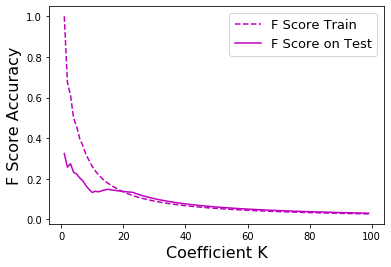

In [13]:
plt.plot(penalties, f_scores_train, 'm--', label='F Score Train') 
plt.plot(penalties, f_scores_test, 'm', label='F Score on Test') 
plt.xlabel(r'Coefficient K', fontsize=16)
plt.ylabel('F Score Accuracy', fontsize=16) 
plt.legend(fontsize=13, loc=1)
plt.show()
 

<p> The graph shows that the model initially overfits the data as the F Score is higher than in the test data. The F Score for train and test then fits better as the K Value increases</p>

<p> The below shows the best K Value for the model</p>

In [14]:
tuned_K_value = kvalues[np.argmax(f_scores_test)]
print(tuned_K_value)

1


In [15]:
print("K Value:", kvalues[np.argmax(f_scores_train)])
print("F Score on Train:", f_scores_train [np.argmax(f_scores_train)])
print("F Score on Test:",f_scores_test[np.argmax(f_scores_test)])

K Value: 1
F Score on Train: 1.0
F Score on Test: 0.32432432432432423


<h6> The below compares the KNN model to a baseline</h6>

In [19]:
def zero_rule_algorithm_classification(x_train, x_test):
    output_values = [row for row in x_train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(x_train))]
    return predicted

seed(1)
predictions = zero_rule_algorithm_classification(mydata.y, x_test)
print(max(predictions))

0


In [20]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = [mydata.y]  
results = confusion_matrix(mydata.y, predictions) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(mydata.y, predictions) )
print('Report : ')
print(classification_report(mydata.y, predictions))

Confusion Matrix :
[[855   0]
 [145   0]]
Accuracy Score : 0.855
Report : 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       855
           1       0.00      0.00      0.00       145

    accuracy                           0.85      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.73      0.85      0.79      1000

